In [1]:
!pip install japanize-matplotlib

In [2]:
import pandas as pd
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [3]:
dat1=pd.read_table('Cashflow.txt',sep=',',index_col=1)
dat2=pd.read_table('AccountingPolicy.txt',sep=',',index_col=1)
dat3=pd.read_table('Assets&Liabilities.txt',sep=',',index_col=1)
dat4=pd.read_table('BalanceSheet1.txt',sep=',',index_col=1)
dat5=pd.read_table('BalanceSheet2.txt',sep=',',index_col=1)
dat6=pd.read_table('BusinessStatus.txt',sep=',',index_col=1)
dat7=pd.read_table('CompanyOverview.txt',sep=',',index_col=1)
dat8=pd.read_table('FundBalance.txt',sep=',',index_col=1)
dat9=pd.read_table('LongDebtStatement.txt',sep=',',index_col=1)
dat10=pd.read_table('Notes.txt',sep=',',index_col=1)
dat11=pd.read_table('PL.txt',sep=',',index_col=1)
dat12=pd.read_table('Profit appropriation statement.txt',sep=',',index_col=1)
dat13=pd.read_table('Segment.txt',sep=',',index_col=1)
dat14=pd.read_table('ShortDebtStatement.txt',sep=',',index_col=1)
dat15=pd.read_table('Statement_of_Changes_in_ShareholdersEquity.txt',sep=',',index_col=1)
dat16=pd.read_table('SupplementaryDetails.txt',sep=',',index_col=1)
dat17=pd.concat([dat1,dat2,dat3,dat4,dat5,dat6,dat7,dat8,dat9,dat10,dat11,dat12,dat13,dat14,dat15,dat16],axis=1)

C:\Users\IchiroKozakai\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (66,206,209,212,215) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
l=list(dat17.columns)
l=[col.lstrip('1234567890POIUYTREWQASDFGHJKLMNBVCXZ').lstrip() for col in l]
dat17.columns=l
dat17=dat17.loc[:,~dat17.columns.duplicated()]

In [5]:
coldrop=[col for col in l if dat17[col].isnull().sum()/len(dat17)==1]
dat17=dat17.drop(coldrop,axis=1)

In [6]:
def f(a):
  x=['04','06','09','11']
  y=['01','03','05','07','08','10','12']
  if (a[6:8]=='00')&(a[4:6] in x):
    return(a[:6]+'30')
  elif (a[6:8]=='00')&(a[4:6] in y):
    return(a[:6]+'31')
  elif (a[6:8]=='00')&(a[4:6]=='02'):
    return(a[:6]+'28')
  else:return(a)
def g(a):
  return (a[:4]+'-'+a[4:6]+'-'+a[6:8]) 
dat17['決算年月日']=dat17['決算年月日'].astype(str).apply(f).apply(g)
  

In [7]:
def df1(a):
    if '--0-3-' in a:
        return(a[:4]+'-'+a[6]+a[8]+'-'+'31')
    elif '--0-6-' in a:
        return(a[:4]+'-06-30')
    elif '--0-5-' in a:
        return(a[:4]+'-05-31')
    elif '--0-9-' in a:
        return(a[:4]+'-09-30')
    elif '--1-2-' in a:
        return(a[:4]+'-12-31')
    elif '--0-1-' in a:
        return(a[:4]+'-01-31')
    elif '--1-0-' in a:
        return(a[:4]+'-10-31')
    elif '--0-4-' in a:
        return(a[:4]+'-04-30')
    elif '--0-2-' in a:
        return(a[:4]+'-02-28')
    elif '--1-1-' in a:
        return(a[:4]+'-11-30')
    elif '--0-8-' in a:
        return(a[:4]+'-08-31')
    elif '--0-7-' in a:
        return(a[:4]+'-07-31')
    else:return(a)
dat17['決算期']=dat17['決算年月日'].apply(df1)
dat17=dat17.drop('決算年月日',axis=1).rename(columns={'決算期':'決算日'})


In [8]:
dat17['決算日']=pd.to_datetime(dat17['決算日'],format='%Y-%m-%d',errors='coerce')

In [9]:
import datetime as dt
DBJ85 = dat17[(dat17['決算日']>=dt.datetime(1985,1,1))&(dat17['決算日']<=dt.datetime(1985,12,31))]
DBJ90 = dat17[(dat17['決算日']>=dt.datetime(1990,1,1))&(dat17['決算日']<=dt.datetime(1990,12,31))]
DBJ95 = dat17[(dat17['決算日']>=dt.datetime(1995,1,1))&(dat17['決算日']<=dt.datetime(1995,12,31))]
DBJ00 = dat17[(dat17['決算日']>=dt.datetime(2000,1,1))&(dat17['決算日']<=dt.datetime(2000,12,31))]
DBJ05 = dat17[(dat17['決算日']>=dt.datetime(2005,1,1))&(dat17['決算日']<=dt.datetime(2005,12,31))]
DBJ10 = dat17[(dat17['決算日']>=dt.datetime(2010,1,1))&(dat17['決算日']<=dt.datetime(2010,12,31))]

In [10]:
dat18=pd.read_table('stockcode2010.txt',sep=',')
code=dat18['証券コード'].tolist()

In [11]:
dcode85=DBJ85['株式銘柄ｺｰﾄﾞ'].tolist()
dcode90=DBJ90['株式銘柄ｺｰﾄﾞ'].tolist()
dcode95=DBJ95['株式銘柄ｺｰﾄﾞ'].tolist()
dcode00=DBJ00['株式銘柄ｺｰﾄﾞ'].tolist()
dcode05=DBJ05['株式銘柄ｺｰﾄﾞ'].tolist()
dcode10=DBJ10['株式銘柄ｺｰﾄﾞ'].tolist()
code85=[num for num in dcode85 if num in code]
code90=[num for num in dcode90 if num in code]
code95=[num for num in dcode95 if num in code]
code00=[num for num in dcode00 if num in code]
code05=[num for num in dcode05 if num in code]
code10=[num for num in dcode10 if num in code]


In [12]:
tosho1_85=DBJ85[DBJ85['株式銘柄ｺｰﾄﾞ'].isin(code85)]
tosho1_90=DBJ90[DBJ90['株式銘柄ｺｰﾄﾞ'].isin(code90)]
tosho1_95=DBJ95[DBJ95['株式銘柄ｺｰﾄﾞ'].isin(code95)]
tosho1_00=DBJ00[DBJ00['株式銘柄ｺｰﾄﾞ'].isin(code00)]
tosho1_05=DBJ05[DBJ05['株式銘柄ｺｰﾄﾞ'].isin(code05)]
tosho1_10=DBJ10[DBJ10['株式銘柄ｺｰﾄﾞ'].isin(code10)]

In [13]:
saleitems=['売上総損益', '割賦販売利益等調整前売上総損益', '総売上高', '売上債権', '売上高修正額合計', '売上原価','関係会社売上高']

In [14]:
DBJ85tosho1sale=tosho1_85.loc[:,saleitems]
DBJ90tosho1sale=tosho1_90.loc[:,saleitems]
DBJ95tosho1sale=tosho1_95.loc[:,saleitems]
DBJ00tosho1sale=tosho1_00.loc[:,saleitems]
DBJ05tosho1sale=tosho1_05.loc[:,saleitems]
DBJ10tosho1sale=tosho1_10.loc[:,saleitems]

In [15]:
salenum85=[DBJ85tosho1sale[item].count() for item in saleitems]
salenum90=[DBJ90tosho1sale[item].count() for item in saleitems]
salenum95=[DBJ95tosho1sale[item].count() for item in saleitems]
salenum00=[DBJ00tosho1sale[item].count() for item in saleitems]
salenum05=[DBJ05tosho1sale[item].count() for item in saleitems]
salenum10=[DBJ10tosho1sale[item].count() for item in saleitems]

In [16]:
expenseitems=['営業外費用','販売費及び一般管理費','その他営業外費用','未払費用','前払費用','その他一般管理費','長期前払費用','退職給付費用','経費','当期総製造費用','労務費','材料費','福利厚生費','荷造発送費','広告宣伝費']

In [17]:
DBJ85tosho1expense=tosho1_85.loc[:,expenseitems]
DBJ90tosho1expense=tosho1_90.loc[:,expenseitems]
DBJ95tosho1expense=tosho1_95.loc[:,expenseitems]
DBJ00tosho1expense=tosho1_00.loc[:,expenseitems]
DBJ05tosho1expense=tosho1_05.loc[:,expenseitems]
DBJ10tosho1expense=tosho1_10.loc[:,expenseitems]

In [18]:
expensenum85=[DBJ85tosho1expense[item].count() for item in expenseitems]
expensenum90=[DBJ90tosho1expense[item].count() for item in expenseitems]
expensenum95=[DBJ95tosho1expense[item].count() for item in expenseitems]
expensenum00=[DBJ00tosho1expense[item].count() for item in expenseitems]
expensenum05=[DBJ05tosho1expense[item].count() for item in expenseitems]
expensenum10=[DBJ10tosho1expense[item].count() for item in expenseitems]

In [19]:
capexitems=['償却対象有形固定資産額','有形固定資産当期償却額','有形固定資産期末残高（取得価額ベース）','有形固定資産の減価償却方法','有形固定資産償却累計額','無形固定資産期末残高（取得価額ベース）','無形固定資産当期償却額','無形固定資産償却累計額','有形固定資産当期増加額','無形固定資産の減価償却方法','有形固定資産当期減少額','その他無形固定資産']

In [20]:
DBJ85tosho1capex=tosho1_85.loc[:,capexitems]
DBJ90tosho1capex=tosho1_90.loc[:,capexitems]
DBJ95tosho1capex=tosho1_95.loc[:,capexitems]
DBJ00tosho1capex=tosho1_00.loc[:,capexitems]
DBJ05tosho1capex=tosho1_05.loc[:,capexitems]
DBJ10tosho1capex=tosho1_10.loc[:,capexitems]

In [21]:
capexnum85=[DBJ85tosho1capex[item].count() for item in capexitems]
capexnum90=[DBJ90tosho1capex[item].count() for item in capexitems]
capexnum95=[DBJ95tosho1capex[item].count() for item in capexitems]
capexnum00=[DBJ00tosho1capex[item].count() for item in capexitems]
capexnum05=[DBJ05tosho1capex[item].count() for item in capexitems]
capexnum10=[DBJ10tosho1capex[item].count() for item in capexitems]

In [22]:
otheritems=['研究開発費総額','期末従業員数(名)', '期末従業員数に含まれない臨時従業員･嘱託等（名）']

In [23]:
DBJ85tosho1other=tosho1_85.loc[:,otheritems]
DBJ90tosho1other=tosho1_90.loc[:,otheritems]
DBJ95tosho1other=tosho1_95.loc[:,otheritems]
DBJ00tosho1other=tosho1_00.loc[:,otheritems]
DBJ05tosho1other=tosho1_05.loc[:,otheritems]
DBJ10tosho1other=tosho1_10.loc[:,otheritems]

In [24]:
othernum85=[DBJ85tosho1other[item].count() for item in otheritems]
othernum90=[DBJ90tosho1other[item].count() for item in otheritems]
othernum95=[DBJ95tosho1other[item].count() for item in otheritems]
othernum00=[DBJ00tosho1other[item].count() for item in otheritems]
othernum05=[DBJ05tosho1other[item].count() for item in otheritems]
othernum10=[DBJ10tosho1other[item].count() for item in otheritems]

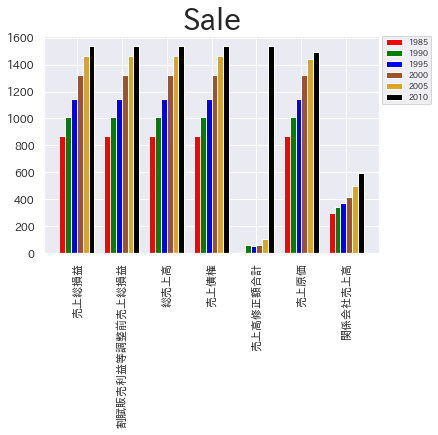

<Figure size 1440x216 with 0 Axes>

In [25]:
import matplotlib.pyplot as plt
import japanize_matplotlib
import numpy as np
import seaborn as sns
sns.set(font="IPAexGothic")
left=np.arange(len(salenum85))
labels=saleitems
width=0.13
plt.bar(left-2*width,salenum85,color='red',width=width,align='center',label='1985')
plt.bar(left-width,salenum90,color='green',width=width,align='center',label='1990')
plt.bar(left,salenum95,color='blue',width=width,align='center',label='1995')
plt.bar(left+width,salenum00,color='sienna',width=width,align='center',label='2000')
plt.bar(left+2*width,salenum05,color='goldenrod',width=width,align='center',label='2005')
plt.bar(left+3*width,salenum10,color='black',width=width,align='center',label='2010')
plt.legend(bbox_to_anchor=(1.01,1),loc='upper left',borderaxespad=0,fontsize=8)
plt.xticks(left+width/2,labels,rotation=90)
plt.title('Sale',x=0.5,y=1,fontsize=30)
plt.figure(figsize=(20,3))
plt.show()

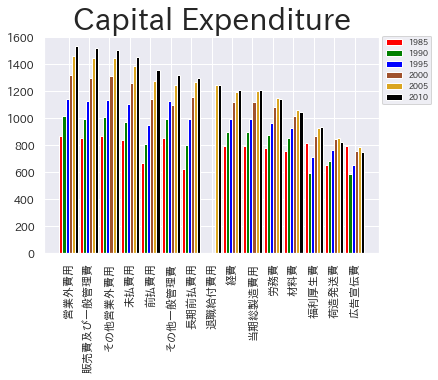

<Figure size 5760x216 with 0 Axes>

In [26]:
left=np.arange(len(expensenum85))
labels=expenseitems
width=0.15
plt.bar(left-2*width,expensenum85,color='red',width=width,align='center',label='1985')
plt.bar(left-width,expensenum90,color='green',width=width,align='center',label='1990')
plt.bar(left,expensenum95,color='blue',width=width,align='center',label='1995')
plt.bar(left+width,expensenum00,color='sienna',width=width,align='center',label='2000')
plt.bar(left+2*width,expensenum05,color='goldenrod',width=width,align='center',label='2005')
plt.bar(left+3*width,expensenum10,color='black',width=width,align='center',label='2010')
plt.legend(bbox_to_anchor=(1.01,1),loc='upper left',borderaxespad=0,fontsize=8)
plt.xticks(left+width/2,labels,rotation=90)
plt.title('Capital Expenditure',x=0.5,y=1,fontsize=30)
plt.figure(figsize=(80,3))
plt.show()

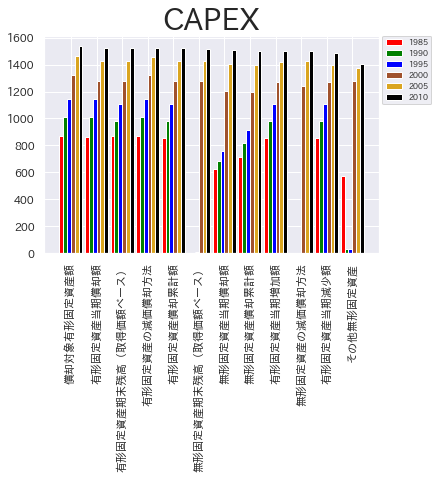

<Figure size 4320x216 with 0 Axes>

In [27]:
left=np.arange(len(capexnum85))
labels=capexitems
width=0.15
plt.bar(left-2*width,capexnum85,color='red',width=width,align='center',label='1985')
plt.bar(left-width,capexnum90,color='green',width=width,align='center',label='1990')
plt.bar(left,capexnum95,color='blue',width=width,align='center',label='1995')
plt.bar(left+width,capexnum00,color='sienna',width=width,align='center',label='2000')
plt.bar(left+2*width,capexnum05,color='goldenrod',width=width,align='center',label='2005')
plt.bar(left+3*width,capexnum10,color='black',width=width,align='center',label='2010')
plt.legend(bbox_to_anchor=(1.01,1),loc='upper left',borderaxespad=0,fontsize=8)
plt.xticks(left+width/2,labels,rotation=90)
plt.title('CAPEX',x=0.5,y=1,fontsize=30)
plt.figure(figsize=(60,3))
plt.show()

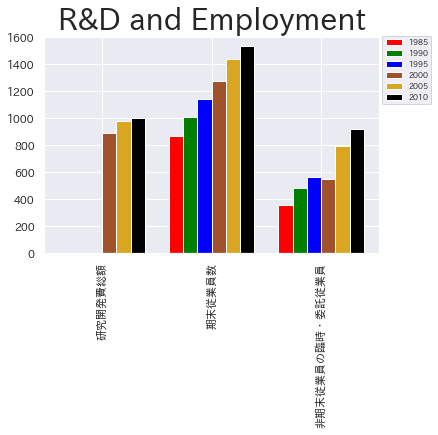

<Figure size 1800x216 with 0 Axes>

In [28]:
left=np.arange(len(othernum85))
labels=['研究開発費総額','期末従業員数','非期末従業員の臨時・委託従業員']
width=0.13
plt.bar(left-2*width,othernum85,color='red',width=width,align='center',label='1985')
plt.bar(left-width,othernum90,color='green',width=width,align='center',label='1990')
plt.bar(left,othernum95,color='blue',width=width,align='center',label='1995')
plt.bar(left+width,othernum00,color='sienna',width=width,align='center',label='2000')
plt.bar(left+2*width,othernum05,color='goldenrod',width=width,align='center',label='2005')
plt.bar(left+3*width,othernum10,color='black',width=width,align='center',label='2010')
plt.legend(bbox_to_anchor=(1.01,1),loc='upper left',borderaxespad=0,fontsize=8)
plt.xticks(left+width/2,labels,rotation=90)
plt.title('R&D and Employment',x=0.5,y=1,fontsize=30)
plt.figure(figsize=(25,3))
plt.show()